<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Статистический анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-равенства-помесячной-выручки-у-абонентов-разных-тарифов" data-toc-modified-id="Проверка-равенства-помесячной-выручки-у-абонентов-разных-тарифов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка равенства помесячной выручки у абонентов разных тарифов</a></span></li><li><span><a href="#Проверка-равнества-помесячной-выручки-у-абонентов-из-Москвы-и-абонентов-из-других-регионов" data-toc-modified-id="Проверка-равнества-помесячной-выручки-у-абонентов-из-Москвы-и-абонентов-из-других-регионов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Проверка равнества помесячной выручки у абонентов из Москвы и абонентов из других регионов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

Целью проекта является изучение и описание поведения абонентов двух тарифов (smart и ultra), а также абонентов из Москвы и других регионов.     
Для достижения цели необходимо выполнить следующие задачи:
* изучить общую информацию о предоставленных данных;
* подготовить данные для анализа: объединить их в один датафрейм, выявить и устранить недостатки в данных, привести данные к нужным типам;
* установить как отличаются средние показания минут разговора, количества сообщений и объёма интернет-трафика у абонентов разных тарифов;
* проверить гипотезы о равенстве помесячной выручки у абонентов разных тарифов и у абонентов из Москвы и других городов.

## Изучение общей информации

Для начала ознакомимся с общей информацией о датасетах: количеством столбцов и строк, наименованием столбцов и типами данных в них, с конкретными данными датасета.   

Импортируем необходимые библиоткеи и модули: 

In [97]:
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')
import statistics as std
from scipy import stats as st

Сохраним анализируемые датафреймы в переменных:
   * *calls* - сведения о звонках абонентов;
   * *internet* - информацию о количестве использованного интернета;
   * *messages* - данные о количестве сообщениий;
   * *tariffs* - описание тарифных планов;
   * *users* - информацию об абонентах.

In [98]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Ознакомимся с общей информацией о таблицах и данными в них с помощью метода `info()`:

In [99]:
print(calls.info())
print()
print(internet.info())
print()
print(messages.info())
print()
print(tariffs.info())
print()
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

<class 'pandas.core.fram

Как видим, таблицы содержат разное количество строк и столбцов, что возможно объяснить различиями в содержащихся данных.

Выведем на экран 5 первых строк каждой таблицы:

In [100]:
display(calls.head())
print()
display(internet.head())
print()
display(messages.head())
print()
display(tariffs.head())
print()
display(users.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод

Данные, содержащиеся в датафрейме, являются достаточными для проведения исследования. Однако ознакомление с конкретными данными позволило выявить недостатки в данных, устранение которых будет проведено на этапе предобработки данных.

## Подготовка данных

Из анализа таблиц следует, что таблицы о дате звонков, отправки сообщений и использования интернета имеют различные наименования: *call_date*, *session_date*, *message_date*. Приведём все данные столбцы к одному общему наименованию - *date*.    

Также напишем функцию `to_date`, которая в каждом датафрейме переведёт значения в столбце с датой в формат даты, а затем добавит столбец с годом, месяцем и днём, когда был совершён звонок, направлено сообщение и использован интернет.    

Выведем результат на экран.


In [101]:
calls.rename(columns={'call_date':'date'}, inplace=True)
internet.rename(columns={'session_date':'date'}, inplace=True)
messages.rename(columns={'message_date':'date'}, inplace=True)

def to_date(df):
    df['date'] = df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%dT%H:%M:%S')
    df['year'] = df['date'].dt.year.astype(int)
    df['month'] = df['date'].dt.month.astype(int)
    df['day'] = df['date'].dt.day.astype(int)
    
to_date(calls)
to_date(internet)
to_date(messages)

display(calls.head())
display(internet.head())
display(messages.head())

,id,date,duration,user_id,year,month,day
0,1000_0,2018-07-25,0.00,1000,2018,7,25
1,1000_1,2018-08-17,0.00,1000,2018,8,17
2,1000_2,2018-06-11,2.85,1000,2018,6,11
3,1000_3,2018-09-21,13.80,1000,2018,9,21
4,1000_4,2018-12-15,5.18,1000,2018,12,15


,Unnamed: 0,id,mb_used,date,user_id,year,month,day
0,0,1000_0,112.95,2018-11-25,1000,2018,11,25
1,1,1000_1,"1,052.81",2018-09-07,1000,2018,9,7
2,2,1000_2,"1,197.26",2018-06-25,1000,2018,6,25
3,3,1000_3,550.27,2018-08-22,1000,2018,8,22
4,4,1000_4,302.56,2018-09-24,1000,2018,9,24


,id,date,user_id,year,month,day
0,1000_0,2018-06-27,1000,2018,6,27
1,1000_1,2018-10-08,1000,2018,10,8
2,1000_2,2018-08-04,1000,2018,8,4
3,1000_3,2018-06-16,1000,2018,6,16
4,1000_4,2018-12-05,1000,2018,12,5


Таким образом, в переименованных столбцах *date* данные приведены к формату дата, а также в каждой таблице созданы столбцы *year*, *month*, *day* c cоответствующими данными для каждой оперции абонента.

Создадим объединённый датафрейм в переменной *df*. С помощью функции `merge` последовательно будем "пристёгивать" таблицы, сохраняя результат в *df*, при этом в отношении каждого пользователя будем рссчитывать продолжительность звонков, количество использованного интернета и отправленных сообщений в каждом месяце:

In [102]:
# объединим таблицы calls и internet, результат сохраним в переменной df
calls = calls.groupby(
    ['user_id', 'month']).agg(
    {'duration': 'sum', 'id': 'count'}).reset_index().rename(columns={"id": "calls_quantity"})
internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()
df = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')

# объединим df c таблицей messages, переименуем в таблице messages столбец id на messages_quantity, в котором будем 
# хранить данные о количестве отправленных сообщений у каждого абонента в месяце
messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'}).reset_index().rename(columns={"id": "messages_quantity"})
df = df.merge(messages, on = ['user_id', 'month'], how = 'outer')

# добавим в df данные об абонентах, хранящиеся в таблице users. Переименуем столбец tariff в tariff_name
df = df.merge(users, on = 'user_id', how = 'outer')
df.rename(columns={'tariff':'tariff_name'}, inplace=True)

# объединим df c таблицей tariffs и выведем первые 5 строк получившегося датафрейма на экран
df = df.merge(tariffs, on = 'tariff_name', how = 'outer')
df.head()

,user_id,month,duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.00,150.06,22.00,"2,253.49",22.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.00,158.90,43.00,"23,233.77",60.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.00,318.80,47.00,"14,003.64",75.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.00,389.87,52.00,"14,055.93",81.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.00,440.14,58.00,"14,568.91",57.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Вызовем метод `info()` к получившемуся датафрейму:

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
duration                 3174 non-null float64
calls_quantity           3174 non-null float64
mb_used                  3203 non-null float64
messages_quantity        2717 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff_name              3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute         

В результате получили объединённый датафрейм со всеми необходимыми данными для проведения дальнейшего анализа. Общее количество строк в датафрйме - 3 216, общее количество столбцов - 20.

Посчитаем количество пропусков в каждом столбце датасета путём применения методов `isna()` и `sum()`:

In [104]:
df.isna().sum()

user_id                     0
month                       2
duration                   42
calls_quantity             42
mb_used                    13
messages_quantity         499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Пропуски обнаружены в столбцах *month*, *duration*, *calls_quantity*, *mb_used*, *messages_quantity*, *churn_date*.    

При этом в столбце *month* всего 2 пропуска, поэтому удалим соответствующие строки. В столбце *churn_date* очень много пропусков, это говорит о том, что в датафрйме большая часть данных в отношении абонентов, которые на момент выгрузки данных оставались абонентами оператора. Заполним пропуски нулями.    

Предположим, что пропуски в столбцах *duration*, *calls_quantity*, *mb_used*, *messages_quantity* имеются в тех месяцах, когда абонент не пользовался соответствующей услугой. Поэтому заполним пропуски в указанных столбцах 0.     

Также поменяем формат данных в столбцах *messages_quantity*, *calls_quantity*, *month* в целочисленный формат, т.к. данные сведения могут быть тольуо в целых значениях, а в столбцах *churn_date* и *reg_date* в формат даты:

In [105]:
# Удалим пропущенные значения в столбце month:
df = df.dropna(subset=['month'])

# Заполним пропуски в столбцах duration, calls_quantity, mb_used, messages_quantity, churn_date нулями:
df.loc[df['calls_quantity'].isna(),'calls_quantity'] = 0
df.loc[df['messages_quantity'].isna(),'messages_quantity'] = 0
df.loc[df['churn_date'].isna(),'churn_date'] = 0
df.loc[df['duration'].isna(),'duration'] = 0
df.loc[df['mb_used'].isna(),'mb_used'] = 0

# Приведём данные в столбцах messages_quantity, calls_quantity, month в целочисленный формат, а в столбцах churn_date и reg_date
# в формат даты
df['messages_quantity'] = df['messages_quantity'].astype('int')
df['calls_quantity'] = df['calls_quantity'].astype('int')
df['month'] = df['month'].astype(int)
df['churn_date'] = pd.to_datetime(df['churn_date'], format='%Y-%m-%dT%H:%M:%S')
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%Y-%m-%dT%H:%M:%S')

В столбцах *duration* и *mb_used* округлим данные доцелых чисел, а затем приведём у целочисленному формату:

In [106]:
for i in df:
    if i == 'duration' or i == 'mb_used':
        df[i] = df[i].apply(np.ceil)
        df[i] = df[i].astype(int)
df.head()

,user_id,month,duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,151,22,2254,22,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,159,43,23234,60,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,319,47,14004,75,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,390,52,14056,81,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,441,58,14569,57,52,1970-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Данные в столбцах *duration* и *mb_used* были округлены и переведены в целочисленный формат.

<a id='another_cell'></a>
Поскольку у нас имеется информация о стоимости гигабайта за пределами объёма, включённого по тарифному плану (столбец *rub_per_gb*), добавим также в таблицу данные о количестве использованных гигабайтов абонентами (*gb_used*), <b>а также округлим их до целого в большую сторону</b>, и о количестве гигабайтов, включённых для абонентов по тарифному плану в месяц (*gb_per_month_included*).

In [107]:
df = df.assign(
    gb_used = df['mb_used'] / 1024,
    gb_per_month_included = df['mb_per_month_included'] / 1024
)
df['gb_used'] = np.ceil(df['gb_used']) # Округлим данные об интернет-трафике до целых значений в большую сторону
df['gb_used'] = df['gb_used'].astype(int)
df['gb_per_month_included'] = df['gb_per_month_included'].astype(float)
df.head()

,user_id,month,duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,...,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included
0,1000,5,151,22,2254,22,52,1970-01-01,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,3,30.00
1,1000,6,159,43,23234,60,52,1970-01-01,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,23,30.00
2,1000,7,319,47,14004,75,52,1970-01-01,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,14,30.00
3,1000,8,390,52,14056,81,52,1970-01-01,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,14,30.00
4,1000,9,441,58,14569,57,52,1970-01-01,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,15,30.00


Теперь у нас добавились данные о расходованных гигабайтах в месяц и количестве гигабайтов, включённых в тарифный план.

Посчитаем помесячную выручку с каждого пользователя. Для этого вычтим бесплатный лимит (столбцы *messages_included*, *gb_per_month_included*, *minutes_included*) из суммарного количества звонков (*duration*), сообщений (*messages_quantity*) и интернет-трафика (*gb_used*). Остаток умножим на значение из тарифного плана (*rub_per_message*, *rub_per_gb*, *rub_per_minute*), а таже прибавим абонентскую плату, соответствующую тарифному плану.     

Для расчётов напишем функцию `income_per_month`, которая будет возвращать значение выручки по абоненту. Создадим столбец *income_per_month*, в котором сохраним результаты применения функции по каждому абоненту:

In [108]:
def income_per_month(df):
    messages_over = (df['messages_quantity'] - df['messages_included']) * df['rub_per_message']
    internet_over = (df['gb_used'] - df['gb_per_month_included']) * df['rub_per_gb']
    calls_over = (df['duration'] - df['minutes_included']) * df['rub_per_minute']
    
    if messages_over < 0: 
        messages_over = 0
    if internet_over < 0: 
        internet_over = 0
    if calls_over < 0: 
        calls_over = 0
    
    income_per_month = messages_over + messages_over + internet_over + df['rub_monthly_fee']
    return income_per_month

df['income_per_month'] = df.apply(income_per_month, axis = 1)
df.head()

,user_id,month,duration,calls_quantity,mb_used,messages_quantity,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,gb_per_month_included,income_per_month
0,1000,5,151,22,2254,22,52,1970-01-01,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,3,30.00,"1,950.00"
1,1000,6,159,43,23234,60,52,1970-01-01,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,23,30.00,"1,950.00"
2,1000,7,319,47,14004,75,52,1970-01-01,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,14,30.00,"1,950.00"
3,1000,8,390,52,14056,81,52,1970-01-01,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,14,30.00,"1,950.00"
4,1000,9,441,58,14569,57,52,1970-01-01,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,15,30.00,"1,950.00"


Следовательно, помесячная выручка посчитана в столбце *income_per_month*.

На конечном этапе подготовки данных посчитаем количество дубликатов, т.е. полностью одинаковых строк, с помощью методов `duplicated()` и `sum()`:

In [109]:
print(f'Количество дубликатов в датасете: {df.duplicated().sum()}')

Количество дубликатов в датасете: 0


### Вывод

По результатам подготовки данных:
* заполнены и(или) удалены пропущенные значения;
* при необходимости изменён формат данных;
* добавленные данные об использованных гигабайтах в месяц у каждого пользователя и о количестве гигабайтов, включёггых в тарифный план;
* почитана помесячная выручка по каждому пользователю.

## Статистический анализ данных

Чтобы определить сколько минут разговоров, количества сообщений и трафика интернета в среднем требуется абонентам разных тариных планов сделаем срез по абонентам по тарифным планам, а далее с помощью `pivot_table()` создадим сводные таблицы с соответствующими средними значениями для каждого месяца:

In [110]:
# В переменной df_ultra сохраним срез по абонентам тарифного плана ultra
df_ultra = df.query('tariff_name == "ultra"')

# Выведем на экран количество абонентов по данному тарифному плану, сведенния о которых хранятся в датафрейме
print(f'Количество абонентов тарифа ultra: {len(df_ultra)}')

# Создадим сводную таблицу, содержащую данные о средних данных об использованном трафике, отправленных сообщениях и 
# продолжительности звонков в разрезе каждого месяца. Выведем результат на экран.
df_ultra = df_ultra.pivot_table(index='month', values=['gb_used', 'messages_quantity', 'duration'], aggfunc='mean')
df_ultra

Количество абонентов тарифа ultra: 985


,duration,gb_used,messages_quantity
month,,,
1,405.33,13.22,33.78
2,281.12,12.00,21.96
3,462.97,17.65,32.30
4,432.36,16.96,31.56
5,482.21,19.37,37.85
6,453.45,18.94,41.73
7,515.69,20.51,49.85
8,482.40,19.60,48.44
9,509.60,19.24,52.29


Выполним аналогичные действия для абонентов тарифного плана smart:

In [111]:
# В переменной df_smart сохраним срез по абонентам тарифного плана smart
df_smart = df.query('tariff_name == "smart"')

# Выведем на экран количество абонентов по данному тарифному плану, сведенния о которых хранятся в датафрейме
print(f'Количество абонентов тарифа smart: {len(df_smart)}')

# Создадим сводную таблицу, содержащую данные о средних данных об использованном трафике, отправленных сообщениях и 
# продолжительности звонков в разрезе каждого месяца. Выведем результат на экран.
df_smart = df_smart.pivot_table(index='month', values=['gb_used', 'messages_quantity', 'duration'], aggfunc='mean')
df_smart

Количество абонентов тарифа smart: 2229


,duration,gb_used,messages_quantity
month,,,
1,193.50,8.74,18.24
2,283.41,11.84,24.09
3,368.34,15.23,31.86
4,346.77,13.62,30.74
5,365.71,15.91,33.77
6,373.68,15.95,33.40
7,386.00,15.88,33.75
8,398.37,16.74,33.64
9,405.01,16.39,33.64


Таким образом, мы видим, что в датафрейме большая часть данных относится к абонентам тарифного плана smart (2 229 против 985).

Визуализируем полученные данные и сделаем выводы:

In [112]:
# Создадим функцию, которая будет возвращать график lineplot, построенный для данных по каждому тарифному плану
def month_result(df, column):
    for i in df['tariff_name'].unique():
        current = df.query('tariff_name == @i')
        sns.lineplot(data=current, x='month', y=column, marker='o', label=i)
        plt.legend() 
        plt.show

Применим функцию `month_result` к данным о продолжительности звонков:

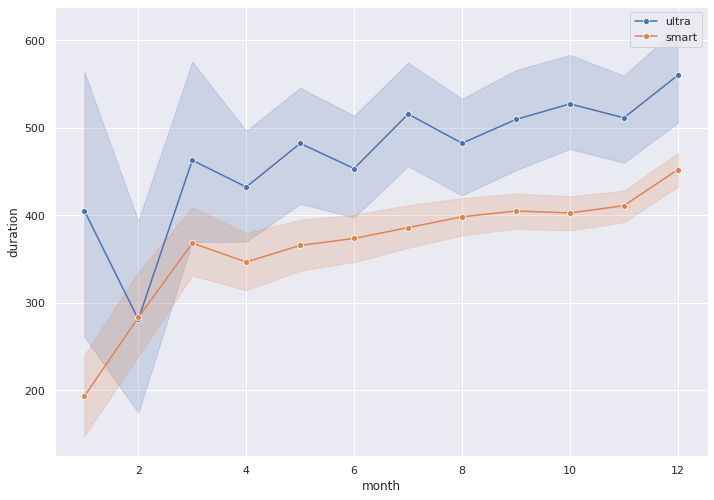

In [113]:
month_result(df, 'duration')

Продолжительность разговоров у абонентов обоих тарифных планов была сопоставима только в феврале 2018 г. В остальные месяцы абоненты тарифного плана *ultra* разговаривали по телефону больше. При этом для абонентов обоих тарифных планов характерен рост продолжительности разговоров к концу 2018 г.

Применим функцию `month_result` к данным об использованном трафике интернета:

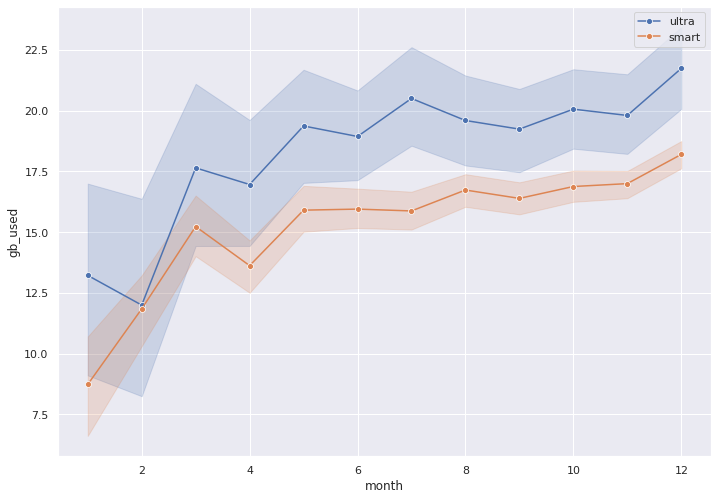

In [114]:
month_result(df, 'gb_used')

Абоненты *ultra* больше используют траифка интернета, чем абоненты тарифа *smart*. 

Применим функцию `month_result` к данным о количестве сообщений:

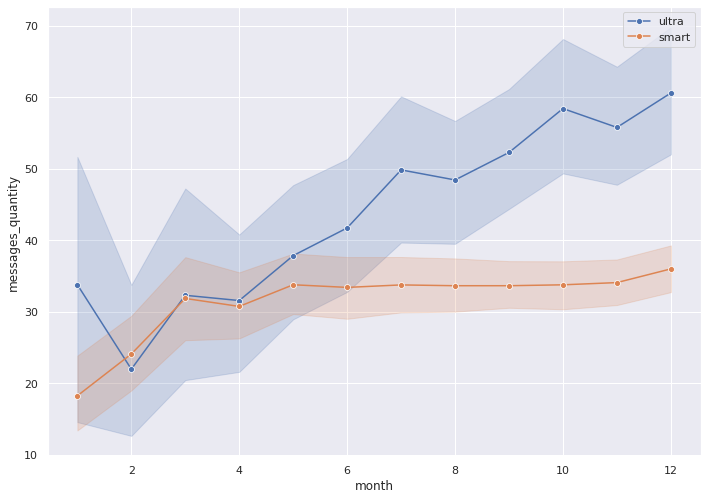

In [115]:
month_result(df, 'messages_quantity')

Пол количеству отправленных сообщений абоненты тарифа *smart* опредили абонентов тарифа *ultra* в феврале 2018 г. В марте и апреле количество отправленных сообщений сопоставимо. В остальные месяцы абоненты по тарифному плану *ultra* отправляли сообщений больше.

Рассчитаем среднее количество (*mean*), стандартное отклонение (*std*), дисперсию (*var*) и коэффициент вариации (*cv*) для данных об использованном интернете, отправленных сообщений, продолжительности разговоров и помесячной выручки в отношении абонентов обоих тарифных планов:

In [116]:
# Создадим цикл, который применит метод describe() к срезам абонентов кадого тарифного плана. Добавим столбец со 
# значением дисперсии (var), возведя стандартное отклонение в квадрат, и коэффициент вариации (cv), разделив 
# стандартное отклонение на среднее:
for i in df['tariff_name'].unique():
    current = df.query('tariff_name == @i')
    current = current[['gb_used', 'messages_quantity', 'duration', 'income_per_month']].describe().T
    current['var'] = current['std'] ** 2
    current['cv'] = current['std'] / current['mean']
    print(f'Тариф: {i}')
    display(current)

Тариф: ultra


,count,mean,std,min,25%,50%,75%,max,var,cv
gb_used,985.00,19.49,9.85,0.00,12.00,19.00,27.00,49.00,97.09,0.51
messages_quantity,985.00,49.36,47.80,0.00,6.00,38.00,79.00,224.00,"2,285.27",0.97
duration,985.00,497.55,299.93,0.00,268.00,489.00,712.00,"1,579.00","89,957.72",0.60
income_per_month,985.00,"2,070.15",376.19,"1,950.00","1,950.00","1,950.00","1,950.00","4,800.00","141,516.75",0.18


Тариф: smart


,count,mean,std,min,25%,50%,75%,max,var,cv
gb_used,"2,229.00",16.33,5.75,0.00,13.00,17.00,20.00,38.00,33.03,0.35
messages_quantity,"2,229.00",33.38,28.23,0.00,10.00,28.00,51.00,143.00,796.81,0.85
duration,"2,229.00",394.92,179.98,0.00,268.00,398.00,516.00,"1,355.00","32,392.91",0.46
income_per_month,"2,229.00","1,182.56",746.71,550.00,550.00,950.00,"1,550.00","5,348.00","557,574.84",0.63


Соответственно, как средние, так и медианные значения по всем показателям выше по тарифу ultra.    

По показателям среднего, стандартного отклонения и дисперсии видно, что данные распределены с большим разбросам по всем показателям, кроме помесячной выручки у абонентов тарифа ultra.

Также коэффициент вариации только для данных о помесячной выручке по тарифу ultra находятся в пределах 30%, что позволяет утверждать об однородности этих данных. По остальным показателям коэффциент вариации является более 30%, т.е. данные неоднородны, сильно распределены от среднего значения, поэтому среднее значение слабо может характиризовать типичные данные в выборке.    

Визуализируем данные с помощью графика distplot:

In [117]:
# создадим функцию, которая будет выводить график distplot:
def dist(df, column):
    for i in df['tariff_name'].unique():
        current = df.query('tariff_name == @i')
        sns.distplot(current[column], label = i)
        plt.legend()
        plt.show

Построим график для данных об интернет трафике у абонентов обоих тарифов:

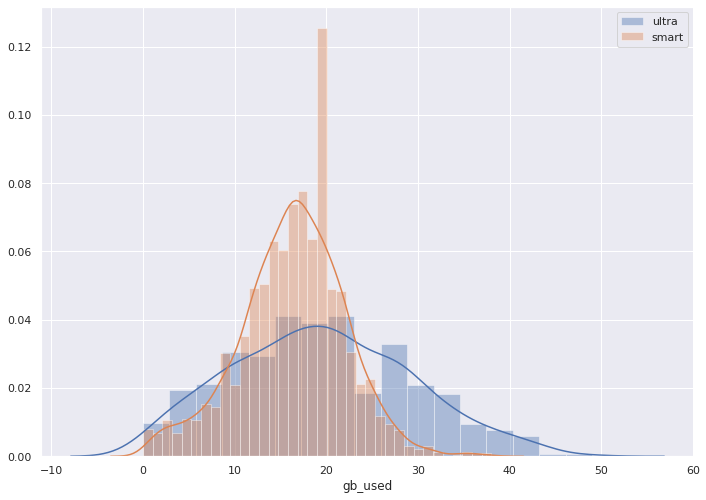

In [118]:
dist(df, 'gb_used')

Видно, что данные по тарифу smart стремятся к нормальному распределению. При этом по таифу smart имеется два пика по частоте распределения. Данные по тарифу ultra скошены вправо.

Теперь построим график для данных о количестве отправленных сообщений:

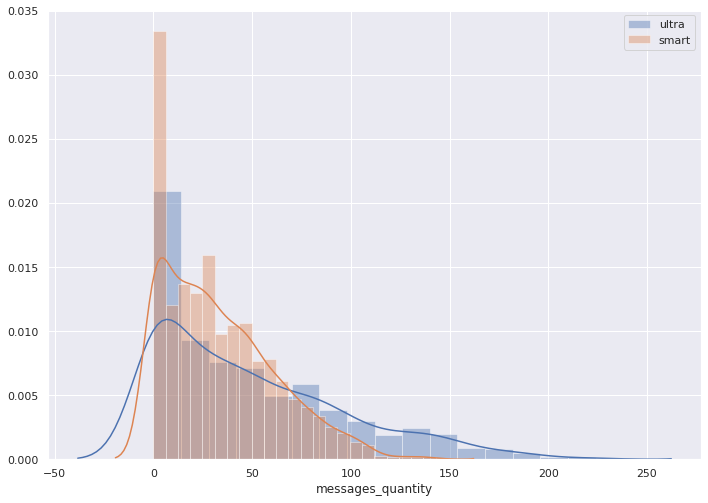

In [119]:
dist(df, 'messages_quantity')

Данные для обоих тарифов имеют длинный правый хвост, т.е. данные о количестве отправленных сообщений сильно разброшены в большую сторону от среднего. Вспомним, что коэффициент вариации для этих данных составляет более 80-90%.

Теперь визуализируем данные для продолжительности звонков у абонентов обоих тарифов:

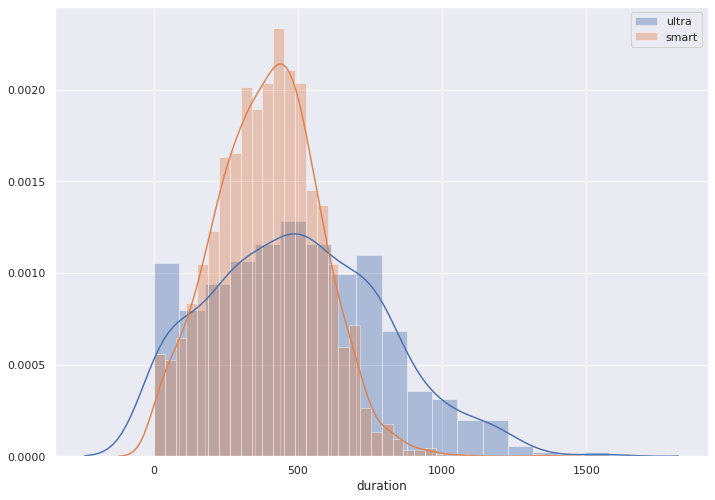

In [120]:
dist(df, 'duration')

Опять видим, что данные по тарифу smart близки к нормальному распределению. Но данные по тарифу ultra имеют сильный правый хвост, т.е. имеют очень много значений, отличающихся от среднего в большую сторону.

Также визуализируем данные по помесячной выручке:

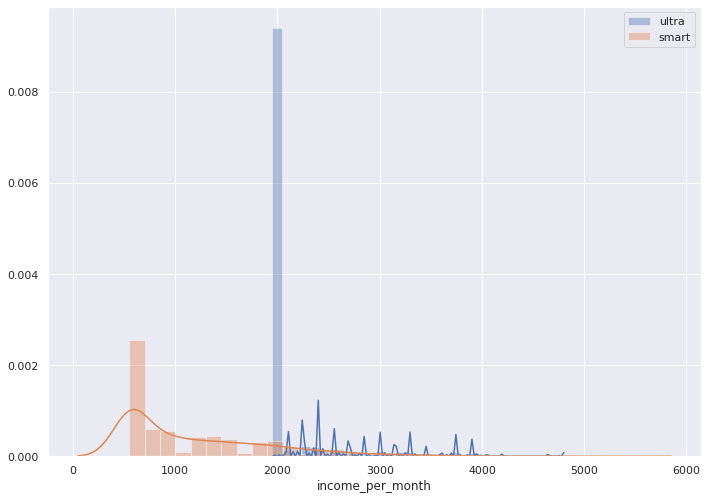

In [121]:
dist(df, 'income_per_month')

Данные по тарифу smart очень сильно ассиметричны вправо. Большая часть значений соответствуют 600-800. По тарифу ultra практически все значения распределены в одном значении (около 1900-2000), о чём свидетельствуют большой столбец на графике. Это подтверждает и ранее рассчитанный коэффициент вариации, который составляет всего 17%.

Рассчитаем коэффициент ассиметрии с помощью метода `skew()`:

In [122]:
for i in df['tariff_name'].unique():
    current = df.query('tariff_name == @i')
    print(f'Коэффициент ассиметрии по данным тарифа: {i}')
    display(current[['gb_used', 'messages_quantity', 'duration', 'income_per_month']].skew().T)

Коэффициент ассиметрии по данным тарифа: ultra


gb_used             0.21
messages_quantity   0.99
duration            0.34
income_per_month    3.72
dtype: float64

Коэффициент ассиметрии по данным тарифа: smart


gb_used             -0.16
messages_quantity    0.82
duration             0.15
income_per_month     1.43
dtype: float64

Таким образом, все данные, кроме тех, что содержатся в столбцах *gb_used* и *duration* по тарифу smart, сильно ассиметричны. При этом ассиметрия является положительной, т.е. в анализируемых данных среднее больше медианы, в чём мы уже убедились.  

### Вывод

По результатам статистического анализа данных установили и рассчитали:
* средние показания минут разговора, количества сообщений и объёма интернет-трафика пользователей каждого тарифа в месяц различаютя. У абонентов тарифа ultra средние значения практически в каждом месяце были больше, чем у абонентов тарифа smart;

* определили стандартное отклонение, дисперсию, коэффициент вариации и коэффициент ассиметричности данных. Данные имеют достаточно большой разброс, кроме данных о помесячной выручке у абонентов тарифа ultrа. При этом данные неоднородны и ассиметричны, за исключением данных об использованном интернет-трафике и продолжительности звонков у абонентов тарифа smart.

## Проверка гипотез

### Проверка равенства помесячной выручки у абонентов разных тарифов

Сформулируем гипотезы:
* H0 = средние помесячные выручки у абонентов тарифов ultra и smart равны.
* H1 = средние помесячные выручки у абонентов тарифов ultra и smart не равны.

Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применив метод `scipy.stats.ttest_ind`:

In [123]:
ultra = df.query('tariff_name == "ultra"')
ultra_income = ultra['income_per_month'] # Сохраним выборку по данным о помесячной выручке для тарифа ultra
smart = df.query('tariff_name == "smart"')
smart_income = smart['income_per_month'] # Сохраним выборку по данным о помесячной выручке для тарифа smart

alpha = 0.01 # Установим в качестве критического уровеня статистической значимости 1%. Если если p-value 
             #окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(ultra_income, smart_income, equal_var = False) # Поскольку дисперсии двух выборок по тарифам
                                                                      # сильно отличаются, установим False для 
                                                                      # параметра equal_var

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.0
Отвергаем нулевую гипотезу


Таким образом, утверждать о равенстве помесячной выручки по двум тарифам мы не можем, т.к. вероятность получить равенство в нашем тесте нулевая.

### Проверка равнества помесячной выручки у абонентов из Москвы и абонентов из других регионов

Сформулируем гипотезы:
* H0 = средние помесячные выручки у абонентов из Москвы и абонентов из других регионов равны.
* H1 = средние помесячные выручки у абонентов из Москвы и абонентов из других регионов не равны.

Посчитаем какое количество абонентов в датафрейме из Москвы и из других регионов:

In [124]:
print(df['city'].value_counts())
print()
print(f'Количество абонентов из Москвы: {len(df.loc[df["city"] == "Москва", "city"])}')
print(f'Количество абонентов из других регионов: {len(df["city"]) - len(df.loc[df["city"] == "Москва", "city"])}')

Москва             611
Санкт-Петербург    270
Новосибирск         98
Уфа                 95
Краснодар           86
                  ... 
Сургут               6
Нижневартовск        6
Кемерово             5
Химки                5
Иваново              2
Name: city, Length: 76, dtype: int64

Количество абонентов из Москвы: 611
Количество абонентов из других регионов: 2603


Соответственно, абонентов из Москвы в датафрейме значительно больше, чем абонентов из других регионов. Учтём это при проведении теста.

Посмотрим как отличаются дисперсии и остальные статистические параметры для данных по абонентам из Москвы и абонентам из других регионов:

In [125]:
moscow = df.query('city == "Москва"')
moscow = moscow['income_per_month'].describe().T
moscow['var'] = moscow['std'] ** 2
print('Статистические параметры по абонентам из Москвы')
display(moscow)

other = df.query('city != "Москва"')
other = other['income_per_month'].describe().T
other['var'] = other['std'] ** 2
print('Статистические параметры по абонентам из других регионов')
display(other)

Статистические параметры по абонентам из Москвы


count       611.00
mean      1,479.48
std         747.96
min         550.00
25%         646.00
50%       1,750.00
75%       1,950.00
max       4,658.00
var     559,442.79
Name: income_per_month, dtype: float64

Статистические параметры по абонентам из других регионов


count     2,603.00
mean      1,448.74
std         778.75
min         550.00
25%         634.00
50%       1,550.00
75%       1,950.00
max       5,348.00
var     606,451.13
Name: income_per_month, dtype: float64

Видим, что дисперсии примерно одинаковые (542,814.88 и 584,790.19). Средние значения помесячной выручки также одинаковы (1,438.04 и 1,403.64), а вот медианные значения отличаются сильнее (1,599.80 и 1,385.78).

Проверим гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применив метод `scipy.stats.ttest_ind`:

In [126]:
moscow = df.query('city == "Москва"')
moscow = moscow['income_per_month'] # Сохраним выборку по данным о помесячной выручке для абонентов из Москвы
other = df.query('city != "Москва"')
other = other['income_per_month'] # Сохраним выборку по данным о помесячной выручке для абонентов из других регионов

alpha = 0.01 # Установим в качестве критического уровеня статистической значимости 1%. Если если p-value 
             #окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(moscow, other) # Поскольку дисперсии двух выборок по месту проживания абонентов схожи
                                             # менять стандартное значение параметра equal_var = True не будем

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.3764081395323552
Не получилось отвергнуть нулевую гипотезу


Таким образом, поскольку p-value больше критического уровня значимости отвергнуть нулевую гипотезу не получилось. Следовательно, в проведённом тесте значимые отличия размера помесячной выручки у абонентов из Москвы и из других регионов не установлены.

### Вывод

По итогам проверки гипотез мы пришли к следующим выводам:
* основния для утверждения о равенстве помесячной выручки для абонентов тарифов smart и ultra отсутствуют; 
* значимые отличия между помесячной выручки у абонентов из Москвы и из других регионов не обнаружены.

## Общий вывод

По результатам проведённого анализа можно сделать следующие выводы:
* Средние значения минут разговора, количества сообщений и объёма интернет-трафика пользователей в месяц у пользователей тарифов smart и ultra не сопоставимы. При этом у абонентов тарифа ultra средние значения практически в каждом месяце были больше, чем у абонентов тарифа smart;    

* Анализируемые данные имеют достаточно большой разброс, кроме данных о помесячной выручке у абонентов тарифа ultrа. При этом данные неоднородны и ассиметричны, за исключением данных об использованном интернет-трафике и продолжительности звонков у абонентов тарифа smart;     

* Основния для утверждения о равенстве помесячной выручки для абонентов тарифов smart и ultra отсутствуют;    

* Значимые отличия между помесячной выручки у абонентов из Москвы и из других регионов не обнаружены.